# Lecture 2: word vector representation 

In [1]:
import nltk
import random
import string
import operator
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

%matplotlib inline

## Exercise 1: tokenization

In this exercise you define a couple of tokenizers and use them on a toy sentence

In [2]:
test_sentence_1 = 'The quick brown fox jumps over the lazy dog.'

### 1.1 - delimiter tokenization

In [3]:
def tokenize_by_split(text):
    """Tokenizes a given string of text by splitting words by whitespace"""
    tokens = text.split()
    return tokens

In [4]:
assert tokenize_by_split(test_sentence_1) == ['The', 'quick', 'brown', 'fox', 
                                              'jumps', 'over', 'the', 'lazy', 'dog.']
print('done')

done


### 1.2 - removing punctuation

In [5]:
def remove_punkt_and_tokenize_by_split(text):
    """Replaces punktuation from given string of text with whitespace, then
    tokenizes it by splitting words by whitespace"""
    punkt_symbols = string.punctuation
    for sym in punkt_symbols:
        text = text.replace(sym, " ")
    tokens = text.split()
    return tokens

In [6]:
assert remove_punkt_and_tokenize_by_split(test_sentence_1) == ['The', 'quick', 'brown', 'fox', 
                                                               'jumps', 'over', 'the', 'lazy', 'dog']
print('done')

done


### 1.3 - using regular expression

In [7]:
test_sentence_2 = "This is a test that isn't so simple: 1.23"

In [8]:
def tokenize_by_regex(text):
    """Tokenizes a given string of text by applying the 'tokenize' method 
    of the provided 'tokenizer' object"""
    tokenizer = nltk.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    return tokens

In [9]:
assert tokenize_by_regex(test_sentence_2) == ['This', 'is', 'a', 'test', 'that', 
                                              'isn', 't', 'so', 'simple', '1', '23']
print('done')

done


### 1.4 - using an advanced tokenizer model

In [10]:
#Use spaCy

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
def tokenize_by_punkt_model(text):
    """Tokenizes a given string of text by applying the NLTK Punkt tokenizer model.
    Uses nltk.word_tokenize method"""
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [13]:
assert tokenize_by_punkt_model(test_sentence_2) == ['This', 'is', 'a', 'test', 'that', 
                                                    'is', "n't", 'so', 'simple', ':', '1.23']
print('done')

done


## Exercise 2: n-grams and stopwords

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. First of all, let's get it!

In [14]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\KiriToK\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

The Brown corpus contains texts from different categories

In [15]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Sentences from each category can be accessed as follows

In [16]:
adv_sents = list(nltk.corpus.brown.sents(categories='adventure'))
print(len(adv_sents))

4637


In [17]:
adv_sents[:2]

[['Dan',
  'Morgan',
  'told',
  'himself',
  'he',
  'would',
  'forget',
  'Ann',
  'Turner',
  '.'],
 ['He', 'was', 'well', 'rid', 'of', 'her', '.']]

Let's see what are the most frequent unigrams in the 'adventure' category

In [18]:
# joins a list of lists of tokens into a one large string of text
adventure_text = ' '.join(list(itertools.chain.from_iterable(adv_sents)))

In [19]:
# uses the tokenizer function we've just written to tokenize text
adventure_tokens = tokenize_by_regex(adventure_text)

In [20]:
# turns each token to lowercase (simple normalization technique)
lowered_tokens = [token.lower() for token in adventure_tokens]
print(len(lowered_tokens))

60004


In [21]:
# counts the number of occurances for each unigram
word_counter = collections.Counter(lowered_tokens)

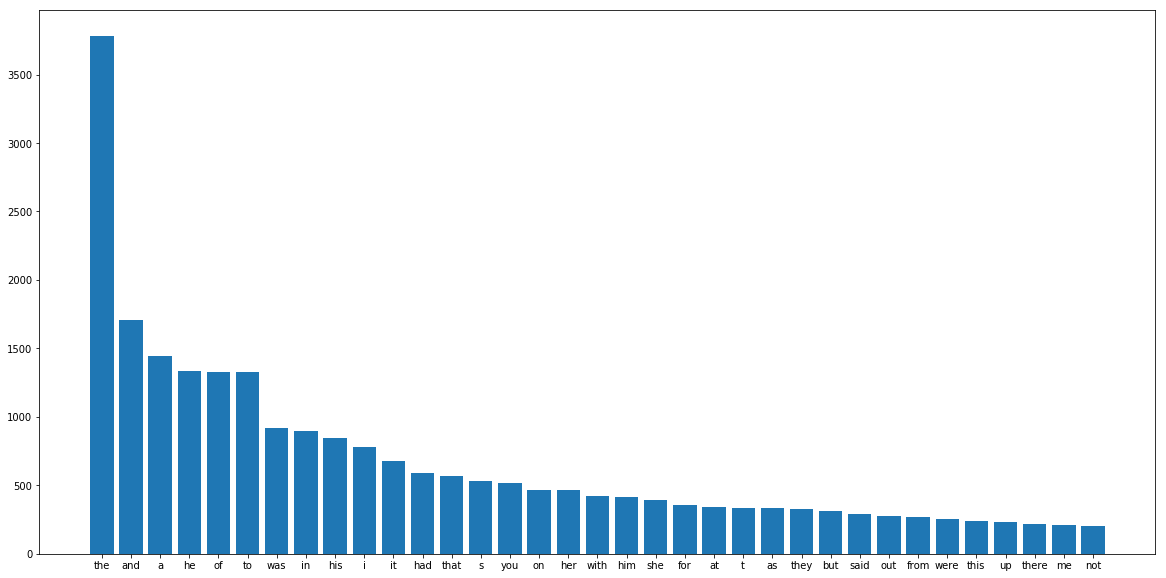

In [22]:
labels = [w[0] for w in word_counter.most_common(35)]
values = [w[1] for w in word_counter.most_common(35)]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,10))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

We notice that some of the most common words above are not very interesting!

### stop-words

In this exersise you remove stopwords, find the most frequent bigrams, then display them on a barplot

In [23]:
# get the list of english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KiriToK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(stopwords))

179


### 2.1 - filtering stop-words

In [25]:
# remove stopwords from the list of 'lowered_tokens'
# your code goes here
stopword_filtered_tokens = [t for t in lowered_tokens if t not in stopwords]

### 2.2 - getting the bigrams

In [26]:
# turn your filtered list of unigrams into a list of bigrams, joint by whitespace
# to achieve that, use the function nltk.ngrams(your_tokens, 2)
# your code goes here
filtered_bigrams = list(nltk.ngrams(stopword_filtered_tokens, 2))

In [27]:
fitlered_merged_bigrams = [' '.join(t) for t in filtered_bigrams]

### 2.3 - counting occurances

In [28]:
# now count the occurances of bigrams using a new Counter instance
# your code goes here
bigram_counter = collections.Counter(fitlered_merged_bigrams)

assert {'miss langford', 'mary jane', 'billy tilghman'}.issubset(set(map(operator.itemgetter(0), 
                                                                         bigram_counter.most_common(15))))
print('done')

done


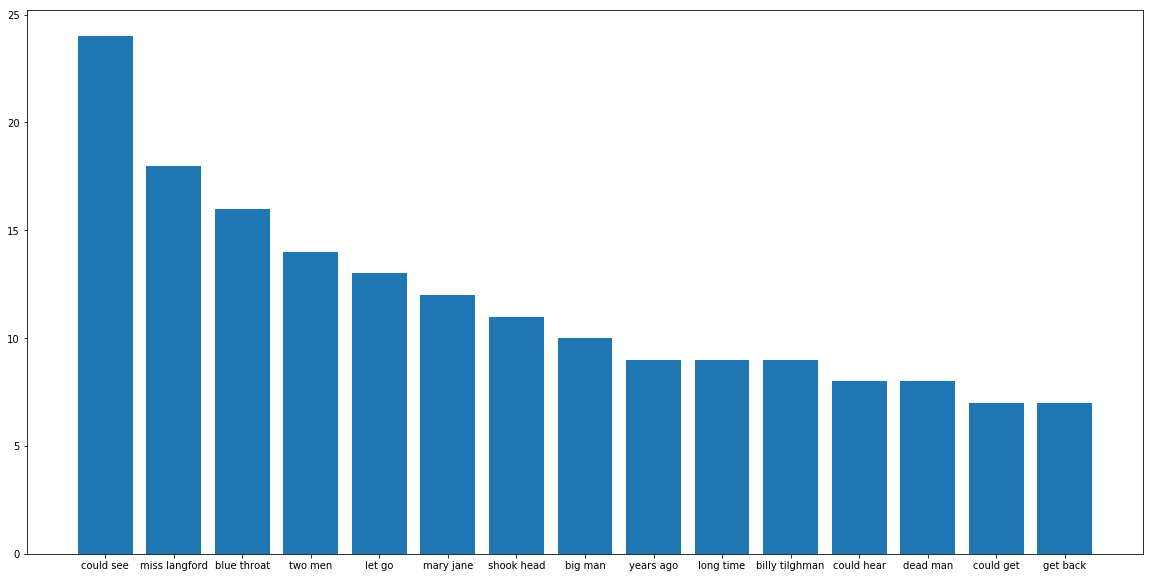

In [29]:
labels = [w[0] for w in bigram_counter.most_common(15)]
values = [w[1] for w in bigram_counter.most_common(15)]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,10))
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

## Home Exercise 1: vocabularies

In this exercise you write a function that builds a vocabulary from the provided text corpus. Then you use it to encode tokens into numeric form

### 3.1 - building a vocabulary

In [30]:
def build_vocabulary(tokens, max_size):
    """
    Builds a dictionary of at most max_size most frequent tokens from the supplied list of tokens.
    More frequent tokens should have a lower id, but that is not strictly required.
    Two special symbols 'NULL':0 and 'UNKN':1 should also be added to the dictionary.
    
    EXAMPLE:
    {
        'NULL': 0,
        'UNKN': 1,
        'the': 2,
        'and': 3,
        'a': 4,
        ...
    }
    """
    vocabulary = {}
    reserved_symbols = ["NULL", "UNKN"]
    
    # your code goes here

    return vocabulary

In [31]:
VOC_SIZE = 5000

my_vocabulary = build_vocabulary(lowered_tokens, VOC_SIZE)

assert len(my_vocabulary) == VOC_SIZE
assert {'NULL', 'UNKN'}.issubset(set(my_vocabulary.keys()))
assert set([w[0] for w in word_counter.most_common(VOC_SIZE-10)]).issubset(set(my_vocabulary.keys()))
print('done')

AssertionError: 

### 3.2 - encoding tokens

In [32]:
def vectorize_tokens(sentence, tokenizer, token_to_id, max_len):
    """
    Converts a list of tokens to a list of token ids using the supplied dictionary.
    Pads resulting list with NULL identifiers up to max_len length.
    """
    ids = []
    
    # STEP 1: convert sentence to a list of tokens
    # your code goes here
    
    # STEP 2: replace tokens with their identifiers from the vocabulary
    # If the token is not present in the vocabulary, replace it with UNKN identifier

    # STEP 3: pad the sequence id's with NULL identifiers until so that it's length is equal to max_len

    return ids

In [33]:
MAX_LEN = 16
test_sentence = 'The animals thundered away into the moonlight , heading for the ridges .'
vectorized = vectorize_tokens(test_sentence,
                              tokenize_by_regex, my_vocabulary, MAX_LEN)

assert len(vectorized) == MAX_LEN
assert [my_vocabulary.get(t, my_vocabulary['UNKN']) 
        for t in tokenize_by_regex(test_sentence)] + [0]*(MAX_LEN-len(tokenize_by_regex(test_sentence))) == vectorized
print('done')

AssertionError: 

### Exercise 4: one-hot encoding

In this exercise you create a function to compute sentence similarity, then build a simple Information Retrieval system

In [34]:
VOC_SIZE = 5000

adv_brown_sents = [' '.join(sent) for sent in nltk.corpus.brown.sents(categories='adventure')]
print(len(adv_brown_sents))

4637


In [35]:
# initialize the CountVectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=VOC_SIZE, stop_words=stopwords, lowercase=True)

In [36]:
# builds the vocabulary from the data
tfidf_vectorizer.fit(adv_brown_sents)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'you', 'both', 'who', 'himself', 'other', 'our', 'same', "mustn't", 'was', 'about', 'most', 're', 'only', 'the', "you're", 'yourself', "mightn't", 'into', 'she', 'against', 'no', 'themselves', "hadn't", 'couldn', 't', 'weren', 'for', 'did', 'me', "shouldn't", "shan't", "hasn't", 'will', ... 'not', 'during', 'o', 'a', 'yourselves', 'from', 'shouldn', 'have', 'which', 'now', 'being', 'too'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
tfidf_vectorizer_vocab = dict(zip(range(len(tfidf_vectorizer.get_feature_names())),
                                  tfidf_vectorizer.get_feature_names()))

In [38]:
# applies one-hot encoding to the provided data, transforming sentences into vectors
vectorized_sents = tfidf_vectorizer.transform(adv_brown_sents)

# the resulting matrix has shape (N_SAMPLES x VOC_SIZE)
vectorized_sents.shape

(4637, 5000)

Let's have a look at the sentence vector

In [39]:
# sentence
print(adv_brown_sents[0])

Dan Morgan told himself he would forget Ann Turner .


In [40]:
# sentence vector is almost all zeroes
print(vectorized_sents[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [41]:
# nonzero elements of the sentence vector
print(vectorized_sents[0].nonzero()[1])

[4932 4389 4251 2021 1219  751  102]


In [42]:
# the words are the same, but the word order is lost, and stopwords are removed
[tfidf_vectorizer_vocab[wid] for wid in vectorized_sents[0].nonzero()[1]]

['would', 'turner', 'told', 'morgan', 'forget', 'dan', 'ann']

In [43]:
# we can now compute the similarity between sentences like so:
sent1vector = vectorized_sents[0]
sent10vector = vectorized_sents[10]
similarity = cosine_similarity(sent1vector, sent10vector)
print(similarity)

[[0.20980297]]


### 4.1 - sentence similarity

In [44]:
def onehot_sentence_similarity(sent1, sent2, vectorizer):
    """Encodes provided sentences using the 'vectorizer' object,
    then computes the cosine similarity between sentence vectors
    Outputs a real number between [0,1] """
    
    # CountVectorizer requires a list of sentences as input
    sent1 = [sent1]
    sent2 = [sent2]
    vec_sent1 = tfidf_vectorizer.transform(sent1)
    vec_sent2 = tfidf_vectorizer.transform(sent2)
    # your code goes here
    similarity = cosine_similarity(vec_sent1, vec_sent2)
    return similarity

In [45]:
test_sentence_1 = 'I like building robots'
test_sentence_2 = 'I also like building pillow fortresses'

In [46]:
assert onehot_sentence_similarity(test_sentence_1, test_sentence_2, tfidf_vectorizer) > 0.5
print('done')

done


### 4.2 - information retrieval

In [47]:
class SearchEngine(object):
    def __init__(self, knowledge_base, voc_size=5000):
        """
        Implements a simple information retrieval system based on Tf-Idf text representation.
        """
        
        self.kbase = np.array(knowledge_base)
        self.vectorizer = TfidfVectorizer(max_features=voc_size)
        self.vectorized_kbase = self.vectorizer.fit_transform(knowledge_base)
        
    def search(self, query, top_k=3):
        """
        Retrieves the top-k documents from the knowledge_base most similar to given query
        """
        
        vectorized_query = self.vectorizer.transform([query])
        
        # your code goes here
        # STEP 1: compute similarities between query and all documents in knowledge base
        result = cosine_similarity(vectorized_query, self.vectorized_kbase)[0]
        # STEP 2: sort the similarities to find most similar document indices
        # HINT: use np.argsort to do that
        res_ind = np.argsort(-result)
        # STEP 3: gets top-k most similar documents from self.kbase, returns them
        results = self.kbase[res_ind[:top_k]]
        return results
        

In [48]:
se = SearchEngine(adv_brown_sents)

In [49]:
query1 = 'take it easy'
result1 = se.search(query1, top_k=3)[0]
assert query1 in result1

query2 = 'uneasy feeling'
result2 = se.search(query2, top_k=1)[0]
assert query2 in result2

print('done')

done


### Home Exercise 1: language models

In this exercise you build a 3-gram language model, then use it to generate grammaticaly valid text

In [52]:
model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
 
for sentence in tqdm(nltk.corpus.brown.sents()):
    for w1, w2, w3 in nltk.trigrams(sentence, pad_right=True, pad_left=True):
        # iterate over all trigrams, accumulate co-occurance counts
        model[(w1, w2)][w3] += 1

for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        # normalize counts to produce a valid probability distribution
        model[w1_w2][w3] /= total_count

100%|█████████████████████████████████████████████████████████████████████████| 57340/57340 [00:05<00:00, 10671.28it/s]


In [67]:
text = [None, None]
 
sentence_finished = False
 
while not sentence_finished:
    # introduce a stochastic variable
    r = random.random()
    accumulator = .0
 
    for word in model[tuple(text[-2:])].keys():
        pr = model[tuple(text[-2:])][word]
        accumulator += pr
        
        # frequent trigrams are more likely to overflow accumulator:
        if accumulator >= r:
            text.append(word)
            break
 
    if text[-2:] == [None, None]:
        sentence_finished = True

print(' '.join([t for t in text if t]))

Man had had a 3-foot anaconda that weighed only 9.8 ounces .


### 5.1 By analogy, implement a 4-gram language model